# Lecture 19 - Heuristics

In [1]:
# # Dependencies: Uncomment and run this cell if you don't have these packages 
# using Pkg
# Pkg.add("JuMP")
# Pkg.add("Gurobi") # You need Gurobi for the lazy constraints
# Pkg.add("Combinatorics")
# Pkg.add("Plots")
# Pkg.add("LKH")

In [2]:
include("../01-tsp/src/data.jl");
include("../01-tsp/src/opt.jl");
include("../01-tsp/src/out.jl");
include("src/lkh.jl");

## Data Input

In [3]:
dat = TSPInstance(250, int = true)

TSP Instance with 250 cities

## Solving

Let's first try the DFJ formulation with lazy constraints, from Lecture 1. On my computer, this runs out of time and we don't even get an initial feasible solution.

In [4]:
env = Gurobi.Env()
optimizer = JuMP.optimizer_with_attributes(
    () -> Gurobi.Optimizer(env), 
    "TimeLimit" => 10); 
mdl_dfj = TSPModel(dat, optimizer = optimizer)
add_dfj_callback!(mdl_dfj);

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-18
Set parameter TimeLimit to value 10


In [5]:
solution_dfj = solve!(mdl_dfj)

Set parameter TimeLimit to value 10
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.4.0 23E214)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 63250 rows, 62500 columns and 250000 nonzeros
Model fingerprint: 0x8f687c66
Variable types: 0 continuous, 62500 integer (62500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 31625 rows and 250 columns
Presolve time: 0.26s
Presolved: 31625 rows, 62250 columns, 186750 nonzeros
Variable types: 0 continuous, 62250 integer (62250 binary)
Root relaxation presolved: 31626 rows, 62250 columns, 186762 nonzeros

Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.01s

Solved with dual simplex

Root relaxation: obje

Nothing

### Heuristic warm start

First, we use LKH to quickly generate a heuristic solution.

Solve time: 2.891124963760376 seconds


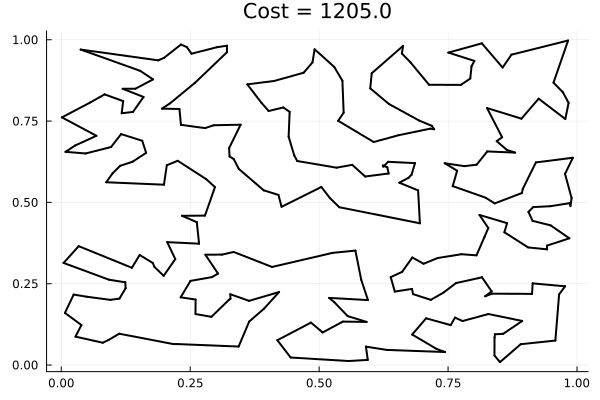

In [6]:
solution_lkh = solve_lkh(dat)
println("Solve time: ", solution_lkh.solve_time, " seconds")
plot_tour(solution_lkh)

Now we'll create a new model, load a warm start, and try again.

In [7]:
# Create new optimizer with longer time limit
optimizer = JuMP.optimizer_with_attributes(
    () -> Gurobi.Optimizer(env), 
    "TimeLimit" => 60)

# Build and solve model
mdl_dfj = TSPModel(dat, optimizer = optimizer)
load_solution(mdl_dfj, solution_lkh)
add_dfj_callback!(mdl_dfj)
solution_dfj = solve!(mdl_dfj)

Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.4.0 23E214)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 63250 rows, 62500 columns and 250000 nonzeros
Model fingerprint: 0xbf440d58
Variable types: 0 continuous, 62500 integer (62500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]

User MIP start produced solution with objective 1205 (0.03s)
Loaded user MIP start with objective 1205

Presolve removed 31625 rows and 250 columns
Presolve time: 0.21s
Presolved: 31625 rows, 62250 columns, 186750 nonzeros
Variable types: 0 continuous, 62250 integer (62250 binary)
Root relaxation presolved: 31625 rows, 62250 columns, 186750 nonzeros

Deterministic concurrent L

TSP Solution with 250 cities

Plot the solution. It's the same as the LKH solution. We found a solution with LKH, and used branch and bound to prove optimality.

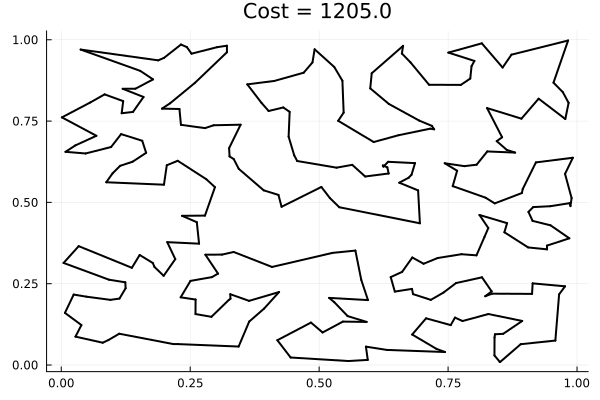

In [8]:
plot_tour(solution_dfj)